<a href="https://colab.research.google.com/github/oliviapang/DS_3001_Assignments/blob/main/Assignment_1/1_Wrangling_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/oliviapang/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 48 (delta 11), reused 5 (delta 5), pack-reused 28 (from 1)
Receiving objects: 100% (48/48), 408.80 KiB | 2.13 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Download complete
Extracting data files...
Data extracted


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Question 1

In [3]:
# 1
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding = 'latin1')
x = df['Price'].str.replace(',','')
x = pd.to_numeric(x, errors = 'coerce')
x.unique()

# Commas were removed from the price column using str.replace, then the type was changed to numeric such that any errors that
# couldn't be converted became NaN

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [4]:
# 2
df = pd.read_csv('/content/data/mn_police_use_of_force.csv', encoding = 'latin1')
df['subject_injury_na'] = df['subject_injury'].isna()
df['subject_injury_imp'] = df['subject_injury'].fillna('Missing')
print(df['subject_injury_imp'].value_counts('normalize'))
# The proportion of missing values is 0.761934
pd.crosstab(df['subject_injury_imp'], df['force_type'])

# The broad and less deadly force types (e.g. bodily force, chemical irritant, improvised weapon) have higher proportions of missing
# values than the force types that are generally more dangerous, including "Gun Point Display" and "Police K9 Bite".
# Additionally, the "Less Leathal" and "Maximal Restraint Technique" columns are missing all values, indicating there could be
# some inconsistency in when injury is recorded or not.

subject_injury_imp
Missing    0.761934
Yes        0.126190
No         0.111876
Name: proportion, dtype: float64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_imp,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [5]:
# 3
df = pd.read_csv('/content/data/metabric.csv', encoding = 'latin1')
map = {'0:LIVING': 1, '1:DECEASED': 0}
df['Overall Survival Status_map'] = df['Overall Survival Status'].map(map)
df['Overall Survival Status_map']

,Overall Survival Status_map
0,1
1,0
2,1
3,0
4,0
...,...
1338,1
1339,0
1340,1
1341,0


In [6]:
# 4
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding = 'latin1')
df['Review Scores Rating_na'] = df['Review Scores Rating'].isna()
print(df['Review Scores Rating_na'].value_counts())
# There are 8323 missing values in Review Scores Rating
imp_value = df['Review Scores Rating'].median()
df['Review Scores Rating_imp'] = df['Review Scores Rating'].fillna(imp_value)
df['Review Scores Rating_imp']
# Imputing missing values could negatively impact these results because it could be giving bad airbnbs artificially high scores.
# The median score calculated from the available data is 94, which is pretty high. It is unlikely that all 8323 properties with
# missing scores would actually score a 94.

Review Scores Rating_na
False    22155
True      8323
Name: count, dtype: int64


,Review Scores Rating_imp
0,94.0
1,94.0
2,94.0
3,94.0
4,96.0
...,...
30473,94.0
30474,94.0
30475,94.0
30476,94.0


Question 2

In [23]:
# 1
df = pd.read_excel('/content/GSAF5.xls')
# This works

In [8]:
# 2
remove = ['Unnamed: 21', 'Unnamed: 22']
df = df.drop(remove, axis = 1)

In [9]:
# 3
'''
An observation is one shark attack. Each row in the dataframe gives information about a certain shark attack including the
location, victime, date, etc. Such details are unique to one attack, making an observation just a single attack. These attacks
are also reported by individuals from different organizations, making the formatting inconsistant. Thus, it would be useful to
clean the data such that all the entries are standardized.
'''

'\nAn observation is one shark attack. Each row in the dataframe gives information about a certain shark attack including the\nlocation, victime, date, etc. Such details are unique to one attack, making an observation just a single attack. These attacks\nare also reported by individuals from different organizations, making the formatting inconsistant. Thus, it would be useful to\nclean the data such that all the entries are standardized. \n'

In [10]:
# 4
df['Year'].describe()
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_clean = df.dropna(subset=['Year'])
print(df_clean['Year'].describe())
# The minimum year is 0, which actually just describes entries  where the year is uncertain/only know a range of years.
# The newest entries are from just a few days ago.
df_clean.loc[df_clean['Year'] > 1940,:]
# It appears that attacks are increasing over time, as there are 5513 entries after 1940, and the total number of entires is 7071.
# However, what seems to be an increase in attacks could also just be a product of the fact that it is easier to report attacks
# with the technology we have today than it was before 1940.

count    7071.000000
mean     1935.991515
std       270.689040
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Fatal Y/N,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Y,?,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,N,1100hrs,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,N,1815hrs,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,N,0830hrs,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,N,1145hrs,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5510,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",NaN,a local dignitary,M,NaN,...,Y,NaN,NaN,"Lt. Col. R. S. Hunt, pp.81-82",1941.00.00.e-local-dignitary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.e,1941.00.00.e,1559.0
5511,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",NaN,a Gurkha soldier,M,NaN,...,N,NaN,NaN,"Lt. Col. R. S. Hunt, p.80",1941.00.00.d-Gurkha-soldier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.d,1941.00.00.d,1558.0
5512,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",Slipped off rocks and fell into the water,boy,M,6,...,Y,NaN,NaN,"Lt.Col. R.S. Hunt, p.80",1941.00.00.c-small-boy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.c,1941.00.00.c,1557.0
5513,1941,1941.0,Unprovoked,IRAN,Khuzestan Province,"Ahvaz, on the Karun River",Standing,I.S.A.C. Ambulance driver,M,NaN,...,Y,NaN,NaN,"Lt.Col. R.S. Hunt, p.80",1941.00.00.b-IASCambulance-driver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1941.00.00.b,1941.00.00.b,1556.0


<Axes: xlabel='Age', ylabel='Count'>

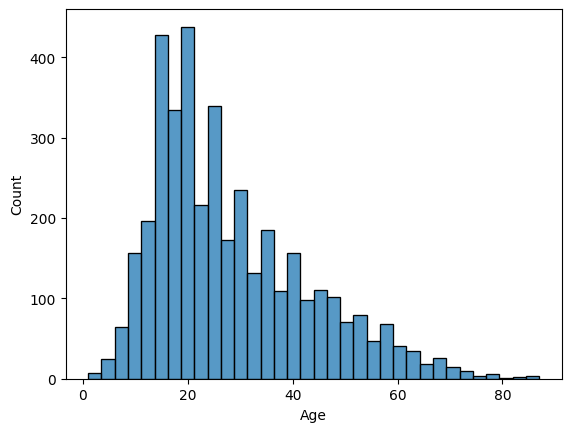

In [11]:
# 5
df['Age_na'] = df['Age'].isna()
x = pd.to_numeric(df['Age'],errors='coerce')
sns.histplot(x)

In [41]:
# 6
x = df['Type'].str.lower()
x = x.str.strip()


def clean(x):
  if x == 'unprovoked':
    return 'Unprovoked'
  elif x == 'provoked':
      return 'Provoked'
  else:
      return 'Unknown'

df['Type_clean'] = x.apply(clean)
df['Type_clean'].value_counts()
# The proportion of unprovoked attacks is 5225/7073 = 0.7387

,count
Type_clean,
Unprovoked,5225
Unknown,1204
Provoked,644


In [47]:
# 7
x = df['Fatal Y/N'].str.lower()
x = x.str.strip()

def clean(x):
  if x == 'y':
    return 'Y'
  elif x == 'n':
    return 'N'
  else:
    return 'Unknown'

df['Fatal Y/N_clean'] = x.apply(clean)
df['Fatal Y/N_clean']

,Fatal Y/N_clean
0,Y
1,N
2,N
3,N
4,N
...,...
7068,Y
7069,Y
7070,Y
7071,Y


In [51]:
# 8
pd.crosstab(df['Type_clean'], df['Fatal Y/N_clean'], normalize = True)
# It looks like the attack is more likely to be fatal if it is unprovoked, which is surprising to me.

Fatal Y/N_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.086809,0.001272,0.002969
Unknown,0.063481,0.078467,0.028277
Unprovoked,0.548282,0.011169,0.179273


Question 3

In [ ]:
'''
1. This paper discusses how to clean data. In particular, it discusses data tidying and its benefits.
2. The "tidy data standard" attempts to assist in initial data exploration and make the development of data analysis tools easier.
3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that tidy
datasets share a common/standard format, making them very similar. Messy datasets can all be messy in different ways, whether
it be non-standard inputs or other formatting errors. These unique quirks make each messy dataset different from the others.
The sentence "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is
surprisingly difficult to precisely define variables and observations in general." means that in a dataset about a certain thing
it is obvious what is a variable and what is an observation. For example, in the shark dataset an observation was one attack event,
and variables included year, age, fatality, etc. However, in a broad more abstract sense and without a concrete example, it is
ahrd to define variables and observations.
4. Values: numbers or strings that make up a dataset; Variables: a grouping of all values that measure the same attribute across
units; Observations: something that contains all values measured on the same unit
5. Tidy data is defined as a standard way of matching a dataset's meaning to its structure. In tidy data, variables form columns,
observations form rows, and each type of observational unit forms a table.
6. Five most common problems: column headers are values instead of variable names, multiple variables stored in one column, variables
stored in rows and columns, multiple types of observational units stored in same table, and a single observational unit is stored in
multiple tables.
Table 4 is messy because the column headers are values of the "income" variable.
Melting a dataset is when columns are turned into rows.
7. Table 11 is messy because the day is a column header, but it is really part of a "date" variable. In Table 12, day, month, and year
have been combined into one "date" variable and made into a column, making the table molten.